In [116]:
import pandas as pd

In [117]:
#!ls '/Users/btsui/Downloads/Popular Indicators (4)/'

In [118]:
#http://databank.worldbank.org/data/indicator/NY.GDP.MKTP.KD.ZG/1ff4a498/Popular-Indicators#
## downloaded from 
csvDf=pd.read_csv('/Users/btsui/Downloads/Popular Indicators (4)/cdf61ca3-98b6-4c62-a176-0990173f0e43_Data.csv')

/Users/btsui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Text(0.5,0,'Years')

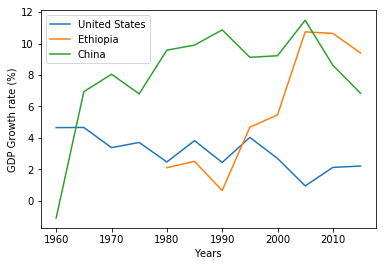

In [119]:
tmpDf=csvDf.loc[:,csvDf.columns.str.contains('^\d+')]
tmpDf.index=csvDf['Country Name'].values

GDP_growth_mask=(csvDf['Series Name']=='GDP growth (annual %)').values
countries_mask=(csvDf['Country Name'].isin(['China','Ethiopia','United States'])).values
tmpDf=tmpDf[countries_mask&GDP_growth_mask].T
tmpDf=tmpDf.apply(lambda tmpS:pd.to_numeric(tmpS,errors='coerce'))#astype(float,errors='ignore')
tmpDf.index=tmpDf.index.str.extract('^(\d+)').astype(int)

chunkSize=5
tmpDf.index=(tmpDf.index/chunkSize).astype(int)*chunkSize
smoothedDf=tmpDf.groupby(tmpDf.index).mean()
ax=smoothedDf[smoothedDf.index>=1960].plot()
ax.legend()
ax.set_ylabel('GDP Growth rate (%)')
ax.set_xlabel('Years')